In [ ]:
#Se importaron las librerías que se utilizarán a lo largo del código 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Se lee el archivo con el que se trabajará, en este caso es el de Tarea1Creditos.
df_credito= pd.read_csv("Tarea1Creditos.csv")

In [ ]:
#Se puede hacer un análisis corto de los primeros datos del dataframe. Es posible observar que existen diferentes columnas que tienen datos 
#demográficos de los clientes como su edad, género, ubicación, etc. 

df_credito.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Loan Ammount,LoanID,Device,Location
0,Male,40,15,39,1200,13e3dfdf97,Android,Rural
1,Male,21,15,81,1100,0880726ca9,Android,Rural
2,Female,43,16,6,1200,b3e95e003a,Android,Rural
3,Female,23,16,77,1300,6da587e76a,Android,Rural
4,Female,50,17,40,1400,d57fa9d372,Android,Rural
5,Female,22,17,76,1400,cecffc56cf,Android,Rural
6,Female,40,18,6,1500,89cc1fa07e,Android,Rural
7,Female,23,18,94,1500,d318a58a54,Android,Rural
8,Male,55,19,3,1500,5bd3cf4a0d,Android,Rural
9,Female,30,19,72,1500,b2d1553385,Android,Rural


Text(0.5, 1.0, 'Histograma de puntaje de gasto (1-100)')

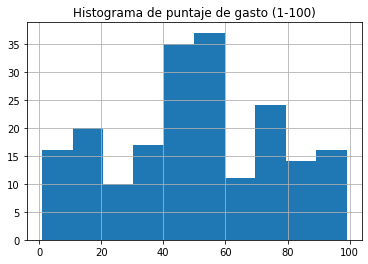

In [ ]:
#Se hizo una gráfica inicial para observar la distribución de los datos del puntaje de gasto
#como se puede observar la mayoría de los clientes tienen entre 40-60 y se puede observar una distribución relativamente normal.
df_credito['Spending Score (1-100)'].hist()
plt.title("Histograma de puntaje de gasto (1-100)")

Text(0.5, 1.0, 'Histograma de ingreso anual (k$)')

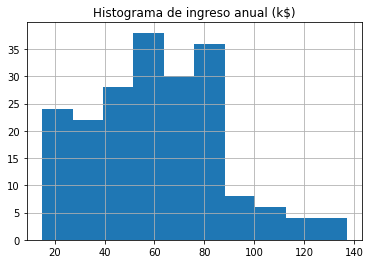

In [ ]:
#De la misma manera se encuentra el histograma para la variable de ingreso anual, en este caso la mayoría está entre 50 y 90 k$ y no se encuentra una
#distribución normal de los datos. 
df_credito['Annual Income (k$)'].hist()
plt.title("Histograma de ingreso anual (k$)")

In [ ]:
#Se encuentran estadísticos descriptivos básicos de las variables cuantitativas del dataframe. Por ejemplo, se puede observar que la empresa solo 
#da préstamos a los mayores de edad ya que el mínimo es 18, el puntaje de gasto mínimo ha sido 1, y hay personas desde hasta 137 k$ que han pedido préstamos. 
df_credito.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,39.03,13.870148,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0
Loan Ammount,200.0,1832.00,560.644819,150.0,1500.00,1700.0,1900.0,3500.0


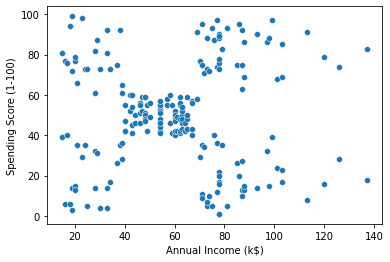

In [ ]:
#Se hace una gráfica de dispersión de los datos y no se pueden observar fácilmente clusters específicos de manera visual. 
sns.scatterplot(data=df_credito,
                x="Annual Income (k$)",
                y="Spending Score (1-100)")

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("husl")

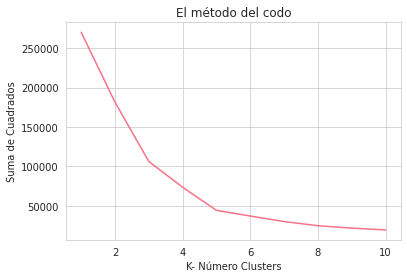

In [ ]:
#Se aplica el método del codo para encontrar el número de clusters adecuado a utilizar. Se pueden observar 2 puntos importantes en el 
#número 3 y 5. De cualquier manera, sería conveniente utilizar el de 5 ya que a partir de ahí no hay otro punto de inflexión tan notorio.
from sklearn.cluster import KMeans
squared_sum=[]
data= df_credito[["Annual Income (k$)","Spending Score (1-100)"]]
for k in range(1,11):
  kmeans_test = KMeans(n_clusters= k)
  kmeans_test.fit(data)
  squared_sum.append(kmeans_test.inertia_)

plt.plot(range(1,11), squared_sum)
plt.title("El método del codo")
plt.xlabel("K- Número Clusters")
plt.ylabel("Suma de Cuadrados")
plt.show()

## Procedimiento con 5 clusters

In [ ]:
#Se obtienen las etiquetas de los clusters a través del método de kmeans utilizando 5 clusters.
kmeans= KMeans(n_clusters=5)
kmeans_labels= kmeans.fit_predict(data)
print(kmeans_labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


[Text(0.5, 1.0, 'Etiquetas generadas para el set de datos')]

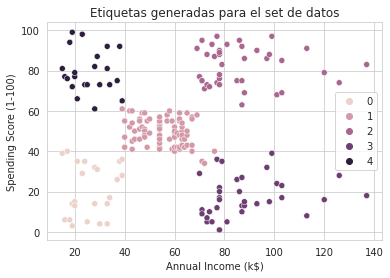

In [ ]:
 #Se graficaron y es posible observar 5 grupos de personas que cumplen con diferentes caracterísitcas en cuanto a su ingreso anual y su puntaje de gastos. 
 sns.scatterplot(data=data,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 hue=kmeans_labels).set(title="Etiquetas generadas para el set de datos")

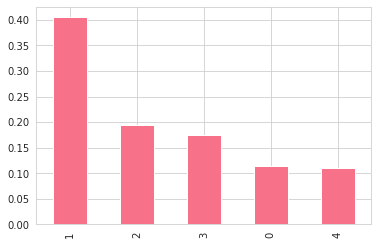

In [ ]:
#Se generó una gráfica de barras para poder observar la distribución de los datos en cuanto al tipo de cliente. Se puede observar que la mayoría son de tipo 2. 
df_credit_kmeans= data.copy()
df_credit_kmeans["tipo_cliente"]=kmeans_labels
df_credit_kmeans["tipo_cliente"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
df_credit_kmeans.head(10)

,Annual Income (k$),Spending Score (1-100),tipo_cliente
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
5,17,76,4
6,18,6,0
7,18,94,4
8,19,3,0
9,19,72,4


In [ ]:
#Se obtienen las estadísticas básicas de las diferentes columnas y se confirma que hay 5 tipos de grupos
df_credit_kmeans.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0
tipo_cliente,200.0,1.76,1.195637,0.0,1.00,1.0,3.0,4.0


In [ ]:
#Se reemplaza el diccionario para qeu se encuentre en string. 
replace_dict={
    0:"Tipo A",
    1:"Tipo B",
    2:"Tipo C",
    3:"Tipo D",
    4:"Tipo E"
}

df_credit_kmeans=df_credit_kmeans.replace({"tipo_cliente":replace_dict})

In [ ]:
df_credit_kmeans

,Annual Income (k$),Spending Score (1-100),tipo_cliente
0,15,39,Tipo A
1,15,81,Tipo E
2,16,6,Tipo A
3,16,77,Tipo E
4,17,40,Tipo A
...,...,...,...
195,120,79,Tipo C
196,126,28,Tipo D
197,126,74,Tipo C
198,137,18,Tipo D


[Text(0.5, 1.0, 'Gráfica con etiquetas generadas')]

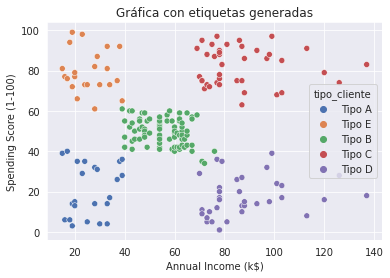

In [ ]:
#Ahora se pudo graficar y con ayuda de las etiquetas es más fácil identificar los 5 clusters encontrados con el método del codo. 
sns.set_style("darkgrid")
sns.set_palette("deep")
sns.scatterplot(data=df_credit_kmeans,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 hue="tipo_cliente",).set(title="Gráfica con etiquetas generadas")

## Procedimiento con 3 clusters

Se realizó el mismo procedimiento con 3 clusters por práctica y para observar las diferencias de manera visual. 

In [ ]:
kmeans2= KMeans(n_clusters=3)
kmeans_labels2= kmeans2.fit_predict(data)
print(kmeans_labels2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
print(kmeans_labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [ ]:
df_credito['Tipo de Cliente'] = kmeans_labels

[Text(0.5, 1.0, 'Etiquetas generadas para el set de datos con 3 clusters')]

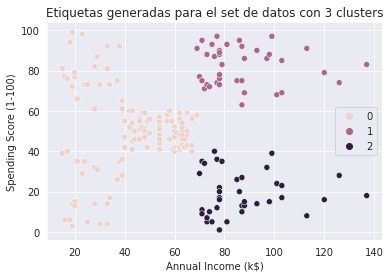

In [ ]:
 sns.scatterplot(data=data,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 hue=kmeans_labels2).set(title="Etiquetas generadas para el set de datos con 3 clusters")

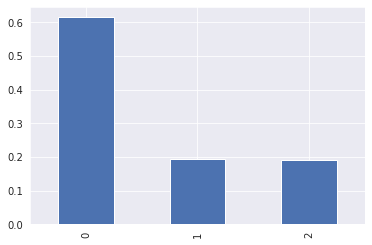

In [ ]:
df_credit_kmeans2= data.copy()
df_credit_kmeans2["tipo_cliente"]=kmeans_labels2
df_credit_kmeans2["tipo_cliente"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
df_credit_kmeans2.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.560,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.200,25.823522,1.0,34.75,50.0,73.0,99.0
tipo_cliente,200.0,0.575,0.792157,0.0,0.00,0.0,1.0,2.0


In [ ]:
replace_dict2={
    0:"Tipo A",
    1:"Tipo B",
    2:"Tipo C"
}

df_credit_kmeans2=df_credit_kmeans2.replace({"tipo_cliente":replace_dict2})

[Text(0.5, 1.0, 'Gráfica con etiquetas generadas de 3 clusters')]

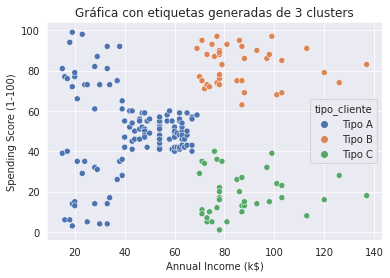

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("deep")
sns.scatterplot(data=df_credit_kmeans2,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 hue="tipo_cliente",).set(title="Gráfica con etiquetas generadas de 3 clusters")

In [ ]:
#Se obtuvo el promedio por tipo de cliente en cuanto a las 2 variables de interés. 
df_credit_kmeans.groupby(["tipo_cliente"]).mean()

,Annual Income (k$),Spending Score (1-100)
tipo_cliente,,
Tipo A,26.304348,20.913043
Tipo B,55.296296,49.518519
Tipo C,86.538462,82.128205
Tipo D,88.200000,17.114286
Tipo E,25.727273,79.363636


In [ ]:
#Se obtuvieron estadísitcos básicos en cuanto a los diferentes grupos encontrados y a las 2 variables de interés. 
df_credit_kmeans.groupby(["tipo_cliente"]).describe()

Annual Income (k$)                                           \
                          count       mean        std   min    25%   50%   
tipo_cliente                                                               
Tipo A                     23.0  26.304348   7.893811  15.0  19.50  25.0   
Tipo B                     81.0  55.296296   8.988109  39.0  48.00  54.0   
Tipo C                     39.0  86.538462  16.312485  69.0  75.50  79.0   
Tipo D                     35.0  88.200000  16.399067  70.0  77.50  85.0   
Tipo E                     22.0  25.727273   7.566731  15.0  19.25  24.5   

                           Spending Score (1-100)                              \
                75%    max                  count       mean        std   min   
tipo_cliente                                                                    
Tipo A        33.00   39.0                   23.0  20.913043  13.017167   3.0   
Tipo B        62.00   76.0                   81.0  49.518519   6.530909  34.0   
Tipo C        95.00  137.0                   39.0  82.128205   9.364489  63.0   
Tipo D        97.50  137.0                   35.0  17.114286   9.952154   1.0   
Tipo E        32.25   39.0                   22.0  79.363636  10.504174  61.0   

                                       
               25%   50%    75%   max  
tipo_cliente                           
Tipo A         9.5  17.0  33.50  40.0  
Tipo B        44.0  50.0  55.00  61.0  
Tipo C        74.5  83.0  90.00  97.0  
Tipo D        10.0  16.0  23.50  39.0  
Tipo E        73.0  77.0  85.75  99.0

In [ ]:
df_credit_kmeans.head()

,Annual Income (k$),Spending Score (1-100),tipo_cliente
0,15,39,Tipo A
1,15,81,Tipo E
2,16,6,Tipo A
3,16,77,Tipo E
4,17,40,Tipo A


In [ ]:
df_credito.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Loan Ammount,LoanID,Device,Location,Tipo de Cliente
0,Male,40,15,39,1200,13e3dfdf97,Android,Rural,0
1,Male,21,15,81,1100,0880726ca9,Android,Rural,4
2,Female,43,16,6,1200,b3e95e003a,Android,Rural,0
3,Female,23,16,77,1300,6da587e76a,Android,Rural,4
4,Female,50,17,40,1400,d57fa9d372,Android,Rural,0


In [ ]:
from google.colab import files
df_credito.to_excel("credito_full.xlsx", encoding="utf8")
files.download("credito_full.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Se reemplaza el diccionario para qeu se encuentre en string. 
replace_dict={
    0:"Tipo A",
    1:"Tipo B",
    2:"Tipo C",
    3:"Tipo D",
    4:"Tipo E"
}

df_credito = df_credito.replace({"Tipo de Cliente":replace_dict})
by_customer = df_credito.groupby("Tipo de Cliente")

In [ ]:
by_customer.describe()

Age                                                        \
                count       mean        std   min    25%   50%    75%   max   
Tipo de Cliente                                                               
Tipo A           23.0  48.304348   8.915945  35.0  41.00  48.0  53.50  67.0   
Tipo B           81.0  42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   
Tipo C           39.0  31.794872   3.635928  26.0  29.50  31.0  33.50  40.0   
Tipo D           35.0  41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   
Tipo E           22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   

                Annual Income (k$)             ... Spending Score (1-100)  \
                             count       mean  ...                    75%   
Tipo de Cliente                                ...                          
Tipo A                        23.0  26.304348  ...                  33.50   
Tipo B                        81.0  55.296296  ...                  55.00   
Tipo C                        39.0  86.538462  ...                  90.00   
Tipo D                        35.0  88.200000  ...                  23.50   
Tipo E                        22.0  25.727273  ...                  85.75   

                      Loan Ammount                                           \
                  max        count         mean         std     min     25%   
Tipo de Cliente                                                               
Tipo A           40.0         23.0  1569.565217  171.715363  1200.0  1500.0   
Tipo B           61.0         81.0  2033.333333  466.100847  1100.0  1800.0   
Tipo C           97.0         39.0  1451.282051  321.691087   150.0  1500.0   
Tipo D           39.0         35.0  2114.285714  865.054523  1200.0  1200.0   
Tipo E           99.0         22.0  1590.909091  163.034004  1100.0  1500.0   

                                         
                    50%     75%     max  
Tipo de Cliente                          
Tipo A           1600.0  1700.0  1700.0  
Tipo B           1900.0  2500.0  3000.0  
Tipo C           1500.0  1600.0  1800.0  
Tipo D           1700.0  3000.0  3500.0  
Tipo E           1650.0  1700.0  1800.0  

[5 rows x 32 columns]

[Text(0.5, 1.0, 'Gráfica con etiquetas generadas de 5 clusters')]

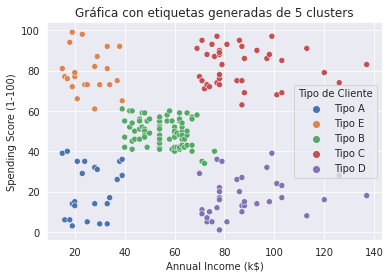

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("deep")
sns.scatterplot(data=df_credito,
                 x="Annual Income (k$)",
                 y="Spending Score (1-100)",
                 hue="Tipo de Cliente",).set(title="Gráfica con etiquetas generadas de 5 clusters")

In [ ]:
ideal = df_credito[df_credito["Tipo de Cliente"] == "Tipo C"]

In [ ]:
ideal.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39.0,31.794872,3.635928,26.0,29.5,31.0,33.5,40.0
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
Loan Ammount,39.0,1451.282051,321.691087,150.0,1500.0,1500.0,1600.0,1800.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7add4cbf90>,
      dtype=object)

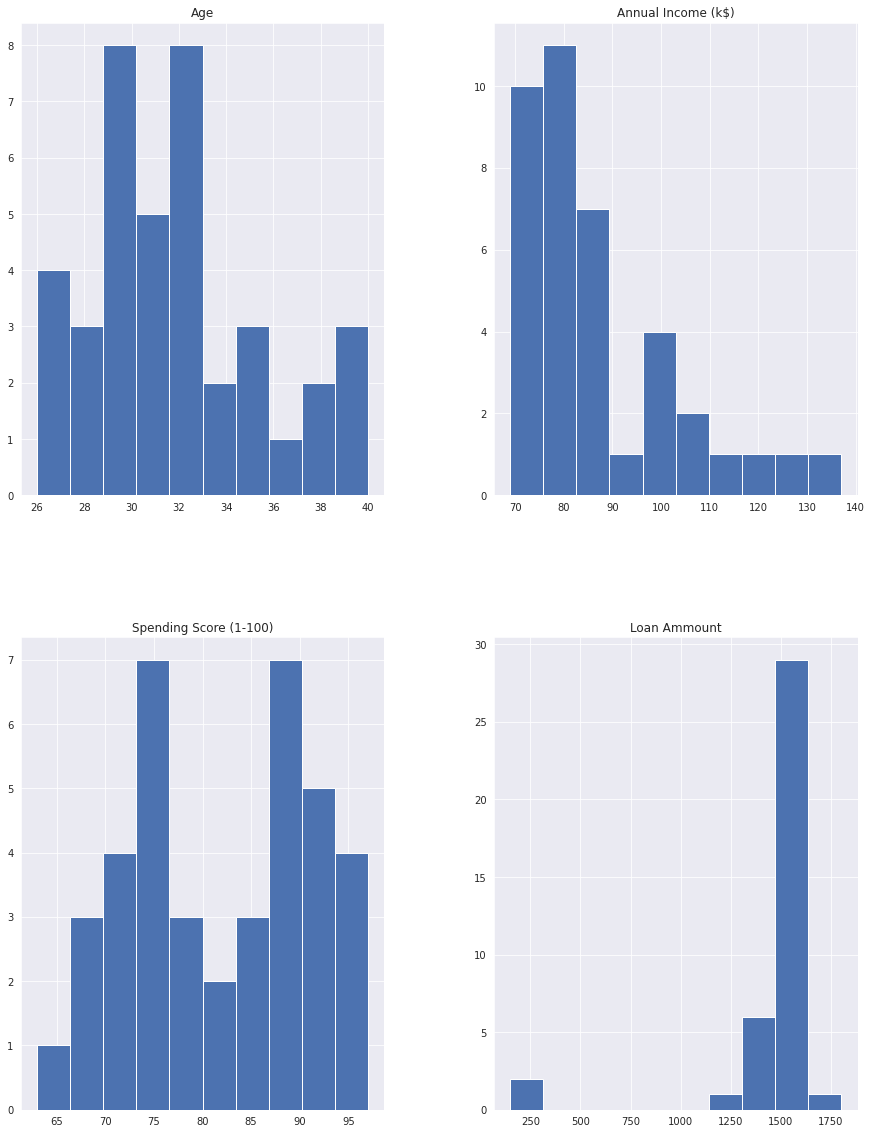

In [ ]:
ideal.hist(figsize = (15,20))

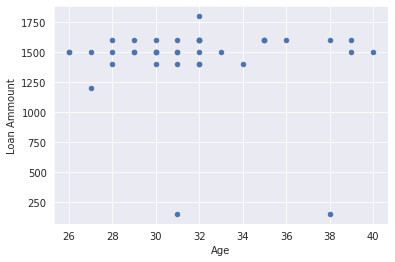

In [ ]:
ideal[['Loan Ammount','Age']].plot(kind='scatter', y='Loan Ammount', x='Age')